# FBSP: Image processing - Spatial Transformations
#### Author: Nick Yao Larsen
#### Email: nylarsen@cfin.au.dk

In this tutorial, we'll apply image transformations on the images like rescale, rotate, shearing, projection transformation and image registration.

## Exercise 1 - Affine transformation
1. Load the image ```'brain1.tif'``` from Moodle and display the image
2. Rescale the image
3. Rotate the image
4. Crop the image
5. Shearing the image
## Exercise 2 - Projection transformation
1. Load the image and display ```skimage.data.text()```
2. Projection transformation - Demo
3. Load and display the MRI images```'brain1.tif'`` and ```'brain1_skew.tif'```
4. Apply projection transformation on the image ```'brain1_skew.tif'```
## Exercise 3 - Scale and translate the image
1. Load and display the MRI images```'brain1.tif'``
2. Scale and translate the image
## Exercise 4 - Image Registration
1. Load and display the MRI images```'brain1.tif'`` and ```'brain1_skew.tif'``` (same as Exercise 2)
2. Apply image registration following the demo of [skimage](https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py)
## Exercise 5 - movie animation
1. Load the image 'mri1.tif' (from Moodle)
2. Create 36 images which rotates 10 degrees clockwise for each image. Save all the rotated images in a multiframe image.
3. Show all 36 images in a montage.
4. Create and play a movie to show the rotating brain.


### Import libraries

In [48]:
# Import necessary libraries
import matplotlib.pyplot as plt
import skimage 
from skimage import io, transform
import numpy as np


### 1.1 Load image
Load the image ```'brain1.tif'``` from Moodle and display the image


In [ ]:
## CODE HERE

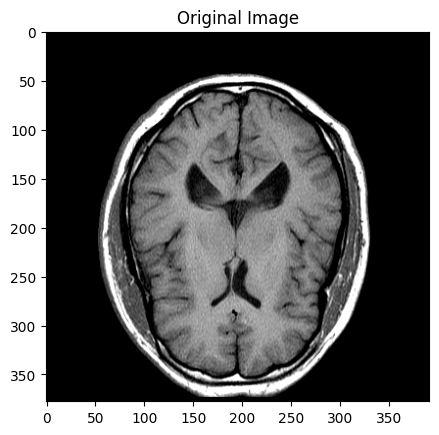

### 1.2 Resizing/Scaling
Rescale the image using the library [skimage.transform](https://scikit-image.org/docs/stable/api/skimage.transform.html). Use a scale_factor of 0.2
- Hint search ```rescale```

In [ ]:
## CODE HERE

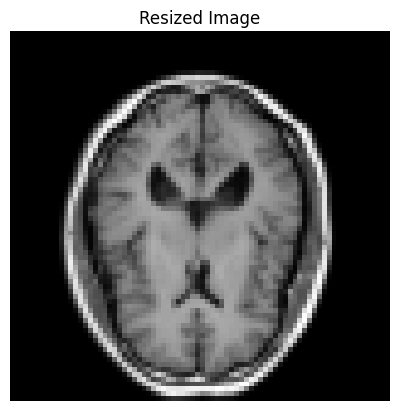

### 1.3 Rotation
Now we want to **rotate** the image with 45 degrees. Use the package [skimage.transform](https://scikit-image.org/docs/stable/api/skimage.transform.html).
- Hint search ```rotate```

In [ ]:
## CODE HERE

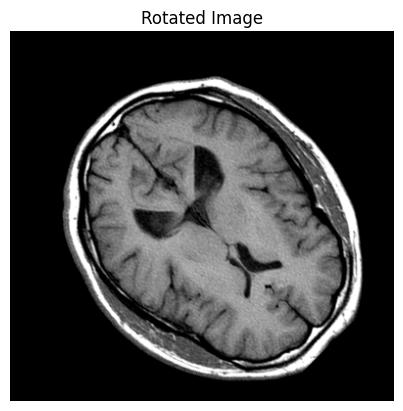

## 1.4 Cropping
Now we need to crop the ```original_image```, so we will zoom in to the area of the ventricle region
- Hint: you indexing of the ```original_image``` and define the region of interst

In [ ]:
## CODE HERE

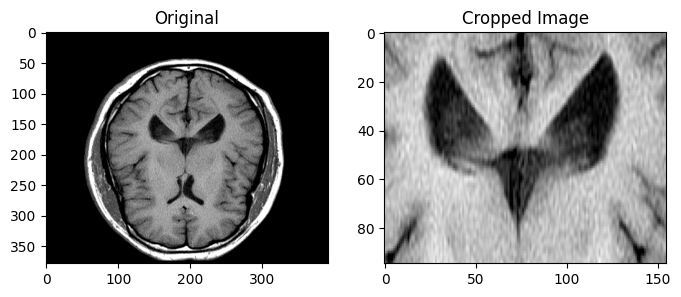

### 1.5 Shearing
Apply shearing to the ```original_image```.
1. First we need to generate the sher_matrix using the package [skimage.transform.AffineTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.AffineTransform). Define your shear to be [0.3,-0.1]
2. Apply the transformation matrix [skimage.transform.wrap](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.warp)


In [ ]:
## CODE HERE

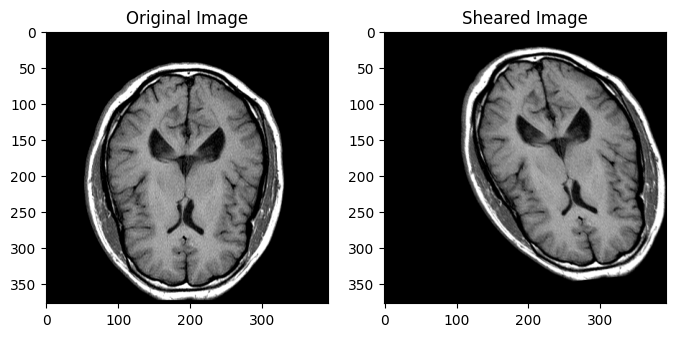

### 2 - Project image Information
**Source Coordinate System**:\
The source coordinate system represents the original image.
Each point in the **source coordinate** system is defined by its (x, y) coordinates.
For example, in a 2D image, the top-left corner is often (0, 0), and the bottom-right corner might be (width, height).

**Destination Coordinate System**:\
The destination coordinate system represents the transformed image.
Like the **source coordinate system**, points in the destination system are defined by (x, y) coordinates.
These coordinates determine where the corresponding points from the source image will be placed in the transformed image.

**Transformation Matrix**:\
The transformation between the source and destination coordinate systems is defined by a transformation matrix.
This matrix encodes how each point in the source is mapped to a point in the destination.
In a projective transformation, this matrix typically has 3x3 dimensions.

**Mapping Points**:\
When you apply the transformation matrix to the source points, it computes the coordinates of the corresponding points in the destination.

### 2.1 Project image
For this exercise we will load the image from ```skimage.data.text()``` and then do the projective transformation using ```ProjectiveTransform``` from [skimage.transform](https://scikit-image.org/docs/stable/api/skimage.transform.html#)
- First load and display the ```text``` image

In [ ]:
## CODE HERE

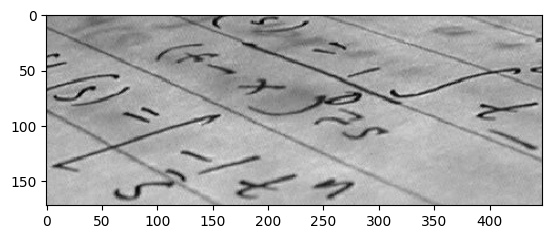

### 2.2 Projection transformation - Demo
Apply the projective transformation using ```ProjectiveTransform``` from [skimage.transform](https://scikit-image.org/docs/stable/api/skimage.transform.html#)

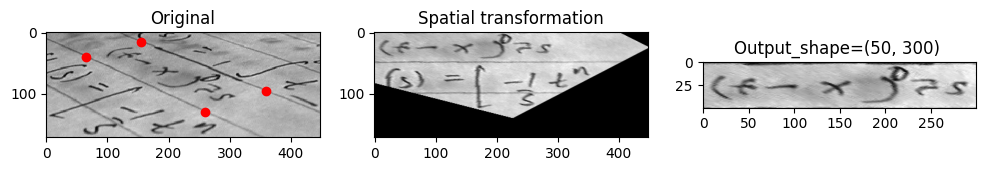

In [26]:
# Define the four corners of the original image
src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
# Define the four corners of the desired output
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform = skimage.transform.ProjectiveTransform()
tform.estimate(src, dst)
warped = skimage.transform.warp(text, tform)
warped_zoom = skimage.transform.warp(text, tform, output_shape=(50, 300))

fig, axes = plt.subplots(1,3,figsize=(12,5))
axes[0].imshow(text, cmap="gray")
axes[0].scatter(dst[:, 0], dst[:, 1], c='r', marker='o')  # Highlight corners
axes[0].set_title("Original")
axes[1].imshow(warped, cmap="gray")
axes[1].set_title("Spatial transformation")
axes[2].imshow(warped_zoom, cmap="gray")
axes[2].set_title(f"Output_shape={50, 300} ")
plt.show()

# https://scikit-image.org/docs/stable/auto_examples/transform/plot_geometric.html#sphx-glr-auto-examples-transform-plot-geometric-py
# https://scikit-image.org/docs/stable/user_guide/geometrical_transform.html

### 2.3 Display MRI images
Apply spatial transformation on an MRI image. So here we need to load the image ```'brain1.tif'``` as reference image and ```'brain1_skew.tif'``` as moving image (both from Moodle).

In [ ]:
## CODE HERE

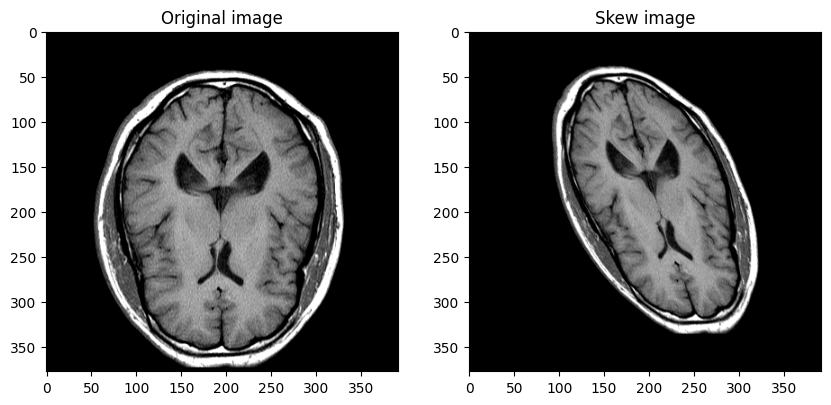

### 2.4 Spatial transformation MRI image
Select 4 feature points on the original and the skewed image and assign the coordinates to a variable for the original and the skewed image respectively.
- Use ```skimage.transform.ProjectiveTransform``` and ```skimage.transform.warp``` to align the skewed image to the reference image. Get inspiration from exercise **2.2**
-   Display the reference image, moving image, and aligned image in one figure


In [ ]:
## CODE HERE

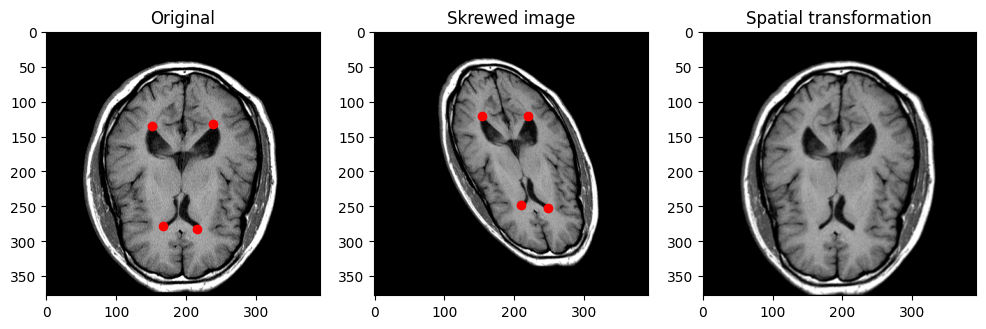

### 3.1 Load and display image
Load and display the image ```'brain1.tif'``` (from Moodle) or just use the original image variable.

In [ ]:
## CODE HERE

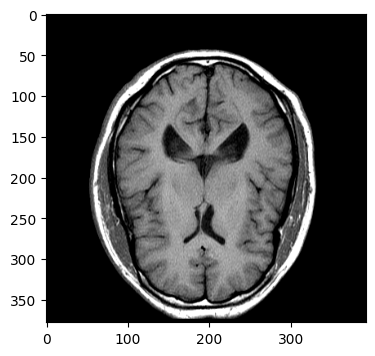

### 3.2 Scale and translate image
-   Scale the image to decrease the size to 0.2 * original size use [skimage.transform.rescale](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.rescale)
-   Translate the scaled image -20 pixels to the right use [transform.AffineTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.AffineTransform)
- Show the scaled image, and the translated image in one figure.

In [ ]:
## CODE HERE

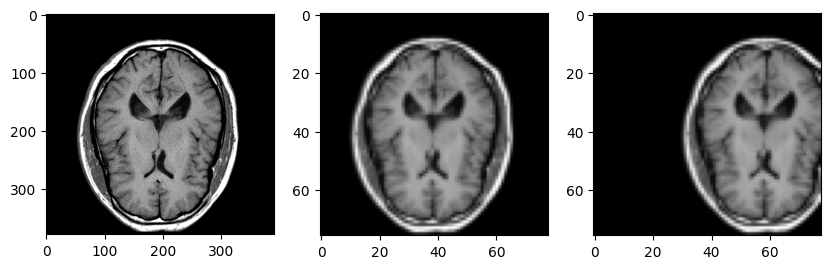

### 4. Apply image registration 
1. Load the image ```'brain1.tif'``` as reference image and ```'brain1_skew.tif'``` as moving image (both from Moodle).

2. Apply image registration by taking inspiration from this demonstration at [skimage](https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py)

In [ ]:
## CODE HERE

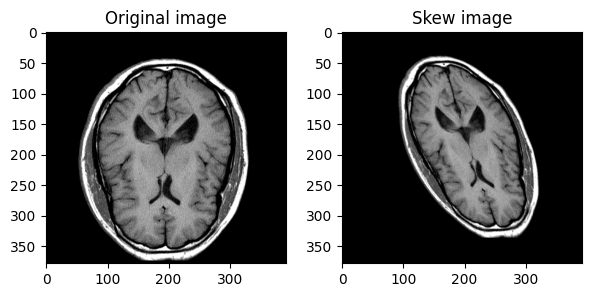

Apply image registration

In [ ]:
## CODE HERE

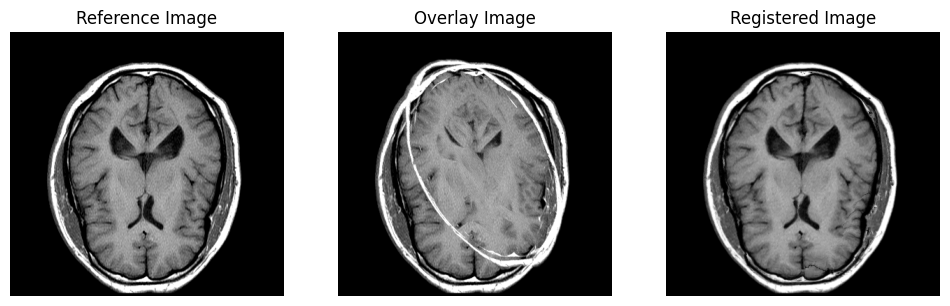

### 5.1 Load the image
For this exercise we will create an animation of a series of images.
1. First we will load the image ```'mri1.tif'``` (from Moodle)


In [ ]:
## CODE HERE

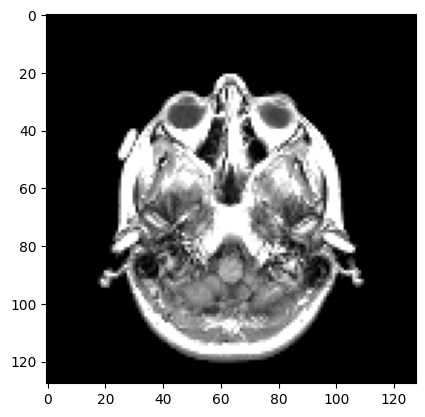

### 5.2 Create a multiframe image
Create 36 images which rotates 10 degrees clockwise for each image.\
Save all the rotated images in a multiframe image.
-   Hint you need to create an empty stack variable that got the shape of ```[img.shape[0],img.shape[1],36]```. You can use ```np.zeros```
-   Make a loop where you put the rotated images images in this multiframe image

In [ ]:
## CODE HERE

### 5.3 Plot all images
Show all 36 images in a montage. Create a subplot that can plot all 36 images.
- Not an easy task, but you need to make a loop inside a loop, also known as a nested loop.

In [ ]:
## CODE HERE

for i in range():
    for j in range():
        # Generate data with a range that varies from one plot to the next.

plt.show()

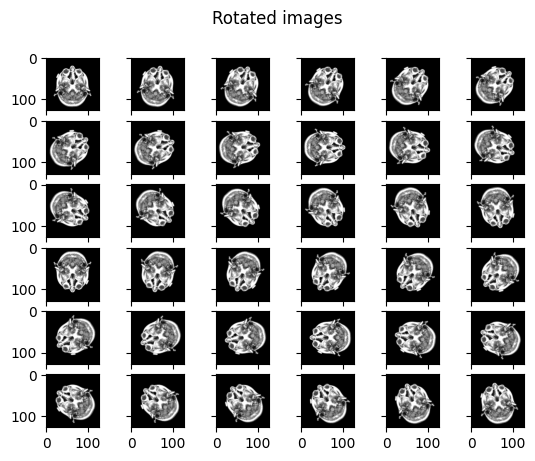

### 5.4 Create and play the movie of the series of images
Create and play a movie to show the rotating brain.
Hint: you can use the [matplotlib.animation.ArtistAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html) module
Hint: need to set ```animation=True``` inside the ```plt.imshow()``` function
Hint: if the image doesnt display write ```%matplotlib tk``` in the top of the script

In [ ]:
## CODE HERE